# **AULA 1 - ANÁLISE DE DADOS COM PANDAS**


In [3]:
#Ensinar a carregar arquivos CSV no Google Colab, realizar leitura e visualização inicial de dados com Pandas. O aluno começará a manipular bases reais de dados com comandos simples de análise.

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv") #cria um dataframe com o nome de 'df'

In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [8]:
df.describe() #mostra as estatisticas (apenas de dados numéricos)

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [9]:
df.shape #mostra a quantidade de linhas e colunas do df

(133349, 11)

In [10]:
linhas, colunas = df.shape[0], df.shape[1]
print('Linhas:', linhas)
print('Colunas:', colunas) #nomeia as informações 'linhas e colunas'

Linhas: 133349
Colunas: 11


In [11]:
df.columns #mostra o titulo de cada coluna do df

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

#renomear as colunas (nesse caso, colocando o nome em portugues)

In [12]:
# Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [13]:
# O método .value_counts() serve para contar quantas vezes cada valor único aparece em uma coluna.
#exibindo quais são as categorias de senioridade e quantas vezes elas aparecem
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [14]:
#exibindo quais são as categorias de contrato e quantas vezes elas aparecem
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [15]:
#exibindo quais são as categorias de modelo de trabalho e quantas vezes elas aparecem

#Sigla	Significado
#0	Presencial
#100	Remoto
#50	Híbrido

df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [16]:
df['tamanho_empresa'].value_counts()


,count
tamanho_empresa,
M,129561
L,3574
S,214


# Modificando o nome das categorias:

In [17]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

,count
senioridade,
senior,77241
pleno,40465
junior,12443
executivo,3200


In [18]:
contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()

,count
contrato,
integral,132563
contrato,394
parcial,376
freelancer,16


In [19]:
tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M':	'media'

}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()


,count
tamanho_empresa,
media,129561
grande,3574
pequena,214


In [20]:
mapa_trabalho = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}

df['remoto'] = df['remoto'].replace(mapa_trabalho)
df['remoto'].value_counts()

,count
remoto,
presencial,105312
remoto,27718
hibrido,319


In [21]:
df.head()


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [22]:
#Podemos também resumir as informações categóricas com o método describe(), exibindo a quantidade de categorias únicas, qual é categoria mais frequente e sua respectiva frequência:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,senior,integral,Data Scientist,USD,US,presencial,US,media
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [23]:
#Com isso já conseguimos responder algumas perguntas, como:

#Qual o nível de experiência mais comum na base de dados?
#Qual é o tipo de contrato mais frequente?
#Qual o cargo mais frequente na amostra?
#De qual país são a maioria dos profissionais da base?
#Qual é o país onde mais empresas da amostra estão sediadas?
#Qual o regime de trabalho mais comum?
#Qual é o tamanho mais comum das empresas na amostra?
#O código é um passo a passo para entender, limpar e preparar a base de dados para análises mais profundas, facilitando a visualização de padrões e tendências no mercado de trabalho em ciência de dados.

# **AULA 2 - PREPARAÇÃO E LIMPEZA DE DADOS**

In [24]:
#Capacitar o aluno renomear colunas, identificar e tratar dados faltantes,

In [25]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [26]:
df.isnull() #mostra quantos dados nulos existem no df

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [27]:
df.isnull().sum() #soma todos os valores nulos do df (ideal para casos como esse onde o df tem mais de 133 mil linhas)

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [28]:
df['ano'].unique() #Checando quais anos existem no DataFrame

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [29]:
df[df.isnull().any(axis=1)] #Exibindo quais linhas estão com os anos nulos

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,senior,integral,Product Manager,184500,USD,184500,US,presencial,US,media
59692,NaN,pleno,integral,Engineer,110000,USD,110000,DE,presencial,DE,media
59710,NaN,junior,integral,Data Scientist,208800,USD,208800,US,presencial,US,media
59759,NaN,senior,integral,Software Engineer,135000,USD,135000,US,presencial,US,media
59789,NaN,senior,integral,Engineer,112000,USD,112000,US,presencial,US,media
131000,NaN,senior,integral,Machine Learning Engineer,163800,USD,163800,US,presencial,US,media
131006,NaN,senior,integral,Data Analytics Manager,204500,USD,204500,US,presencial,US,media
133054,NaN,junior,integral,Data Scientist,40000,USD,40000,JP,remoto,MY,grande
133281,NaN,pleno,integral,Machine Learning Engineer,180000,PLN,46597,PL,remoto,PL,grande
133317,NaN,pleno,integral,Data Scientist,130000,USD,130000,US,hibrido,US,grande


# Exemplos fictícios de opções para tratar valores nulos

In [30]:
# 1. Preenchimento com Valores Derivados (Imputation)
# Para salario: Usar a mediana ou média do salário da mesma categoria, senioridade e país.

# 2. Remover Linhas com Dados Faltantes
# Caso a quantidade de dados nulos seja muito pequena (como neste caso, apenas 5 linhas), você pode simplesmente removê-las.

# 3. Inferência e Preenchimento com Regras de Negócio
# Preencher com base em regras claras.


#Estratégia  	                                           Quando usar
#Imputação  inteligente	                  Quando os dados faltantes são significativos para a análise
#Remoção de linhas                        Quando o volume de nulos é pequeno e não afeta o dataset
#Preenchimento baseado em regra	          Quando há lógica ou negócio claro para inferir o valor

In [31]:
#Exemplo de preenchimento com média e mediana

import numpy as np #importa a biblioteca numpy

df_salarios = pd.DataFrame({  #cria um dataFrame do 0
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'salario': [4000, np.nan, 3500, np.nan, 5000]
})

# Preencher com a média salarial
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# Preencher com a mediana salarial
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,4166.67,4000.0
2,Carlos,3500.0,3500.00,3500.0
3,Diana,NaN,4166.67,4000.0
4,Eduardo,5000.0,5000.00,5000.0


In [32]:
#Exemplo de preenchimento com o valor anterior
#Usar ffill (forward fill)

df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill() #ffill pega o valor anterior e replica nas próximas celulas em branco

df_temperaturas

,dia,temperatura,preenchido_ffill
0,Seg,30.0,30.0
1,Ter,NaN,30.0
2,Qua,NaN,30.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


In [33]:
#Exemplo de preenchimento com o valor posterior
#Usar bfill (backward fill)

df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill() #bfill pega o próximo valor e replica nas celulas anteriores em branco


df_temperaturas

,dia,temperatura,preenchido_bfill
0,Seg,30.0,30.0
1,Ter,NaN,28.0
2,Qua,NaN,28.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


In [34]:
#Exemplo de preenchimento com valor fixo / palavras ou strings

df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Salvador']
})

df_cidades['cidade_corrigida'] = df_cidades['cidade'].fillna('Não informado')

df_cidades

,nome,cidade,cidade_corrigida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Diana,NaN,Não informado
4,Eduardo,Salvador,Salvador


# Removendo os dados nulos do nosso DataFrame e criando o df_limpo

In [35]:
#Remoção das linhas com anos nulos:

df_limpo = df.dropna() #para não alterar o df original, criamos um novo DataFarame chamado df_limpo, e dropamos (removemos) as linhas que não tinham o ano preenchido

In [36]:
df_limpo.isnull().sum() #somando os valores nulos, agora zerados depois do tratamento
#lembrando que o df original não foi modificado, estamos analisando agora do df_limpo


,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


# Alterando o tipo de dados


In [37]:
df_limpo.head()


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [38]:
#Deixar o ano como número inteiro:
#Podemos usar assign() para retornar um novo DataFrame com a modificação:

df_limpo = df_limpo.assign(ano=df_limpo['ano'].astype('Int64'))
df_limpo.head()


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [39]:
#Mostrar como salvar um arquivo após ter sido limpo e preparado para análises posteriores:

df_limpo.to_csv('dados-imersao.csv', index=False)
df_limpo.head()


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


# **AULA 3 - GRÁFICOS**


<Axes: title={'center': 'Distribuição dos níveis de experiência'}, xlabel='senioridade'>

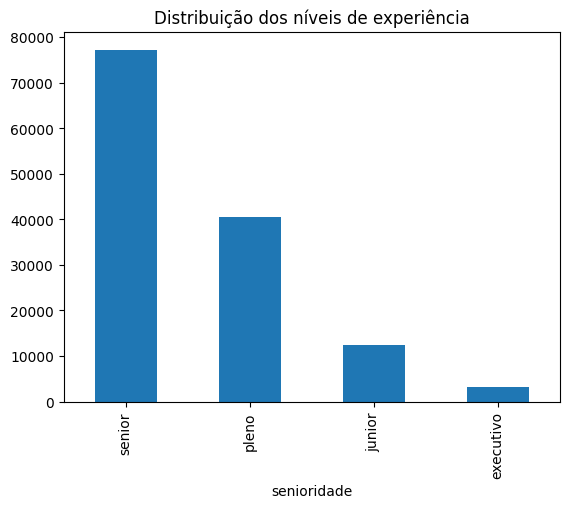

In [40]:
#Criando um gráfico com a própria biblioteca Pandas
#Qual o nível de experiência mais comum na base de dados?

df['senioridade'].value_counts().plot(kind='bar', title='Distribuição dos níveis de experiência') #plot = plotar um gráfico, ou seja, criar um gráfico.
                                                                                                   # kind = tipo de gráfico, no caso, 'bar' que é barra

# Criando o primeiro gráfico com Seaborn


In [41]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

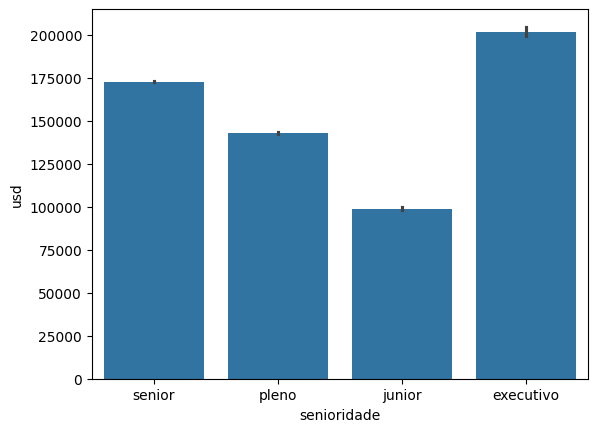

In [42]:
#Qual é a média salarial por nível de senioridade?

sns.barplot(data=df_limpo, x='senioridade', y='usd', estimator='mean') #x= eixo x, ou seja, na horizontal e y na vertical

# Formatando o gráfico com Matplotlib


In [43]:
import matplotlib.pyplot as plt


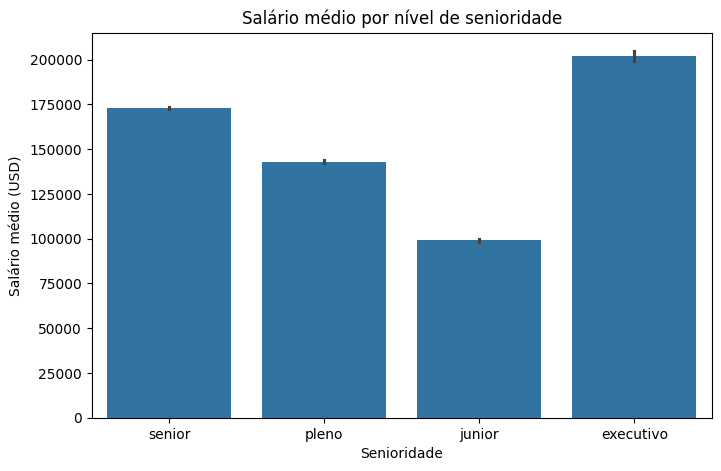

In [44]:
plt.figure(figsize=(8, 5)) #define o tamanho do gráfico (largura e altura)
sns.barplot(data=df_limpo, x='senioridade', y='usd', estimator='mean') #determina o tipo de grafico, no caso 'bar', define os eixos x e y e calcula a média dos valores
plt.title('Salário médio por nível de senioridade')
plt.ylabel('Salário médio (USD)') #nome do eixo y
plt.xlabel('Senioridade') #nome do eixo x
plt.show()

# Ordenando as categorias do maior para o menor valor:


In [45]:
#Dica: Ordenar um gráfico de colunas do maior para o menor valor torna a visualização mais clara e eficiente, pois facilita a comparação entre categorias,
#destaca rapidamente os dados mais relevantes e melhora a legibilidade geral do gráfico. Essa organização permite que o público identifique com facilidade os maiores e menores valores,
#perceba padrões e compreenda a mensagem central dos dados com menos esforço visual.

In [46]:
df.groupby('senioridade')['usd'].mean().sort_values(ascending=False) #ordena de forma ascendente


,usd
senioridade,
executivo,202027.667813
senior,172850.003845
pleno,143041.323489
junior,99039.040264


In [47]:
ordem = df.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index #Organiza os valores da Series do maior para o menor (ascending=False = ordem decrescente).
                                                                                   #Se fosse ascending=True, seria do menor para o maior.

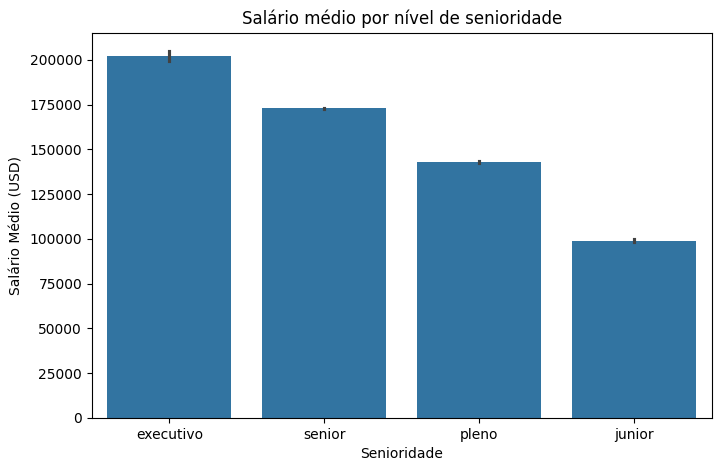

In [48]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', estimator='mean', order=ordem)
plt.title('Salário médio por nível de senioridade')
plt.ylabel('Salário Médio (USD)')
plt.xlabel('Senioridade')
plt.show()

# Analisando a distribuição dos salários


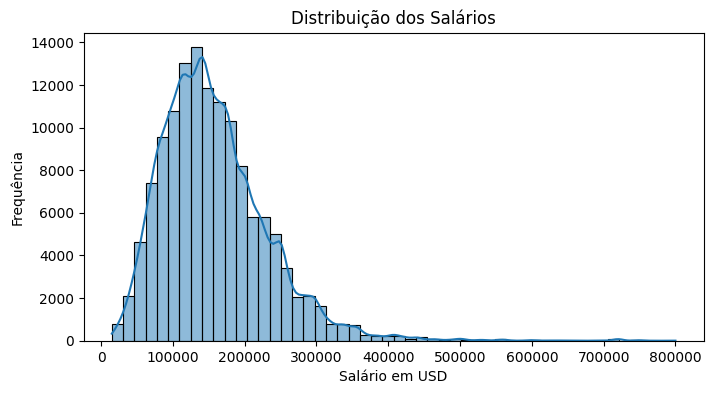

In [49]:
# Histograma

plt.figure(figsize=(8, 4))
sns.histplot(df_limpo['usd'], bins=50, kde=True)
plt.title('Distribuição dos Salários')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

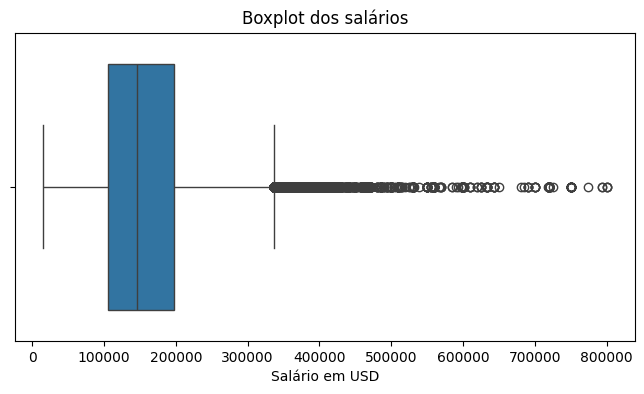

In [50]:
#Boxplot

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxplot dos salários')
plt.xlabel('Salário em USD')
plt.show()

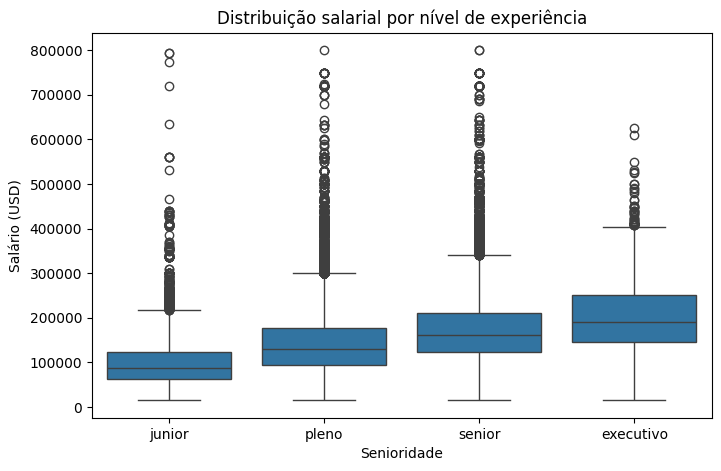

In [51]:
#Como é a distribuição dos salários de acordo com níveis de senioridade?

ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='usd', data=df, order=ordem_senioridade)
plt.title('Distribuição salarial por nível de experiência')
plt.xlabel('Senioridade')
plt.ylabel('Salário (USD)')
plt.show()

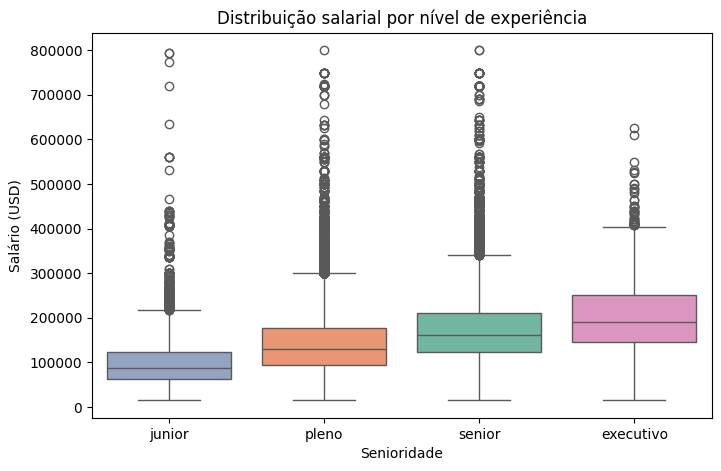

In [52]:
#Se quisermos adicionar uma paleta de cores:

#Paletas pré-definidas podem ser encontradas aqui: https://seaborn.pydata.org/tutorial/color_palettes.html

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='usd', data=df, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Distribuição salarial por nível de experiência')
plt.xlabel('Senioridade')
plt.ylabel('Salário (USD)')
plt.show()

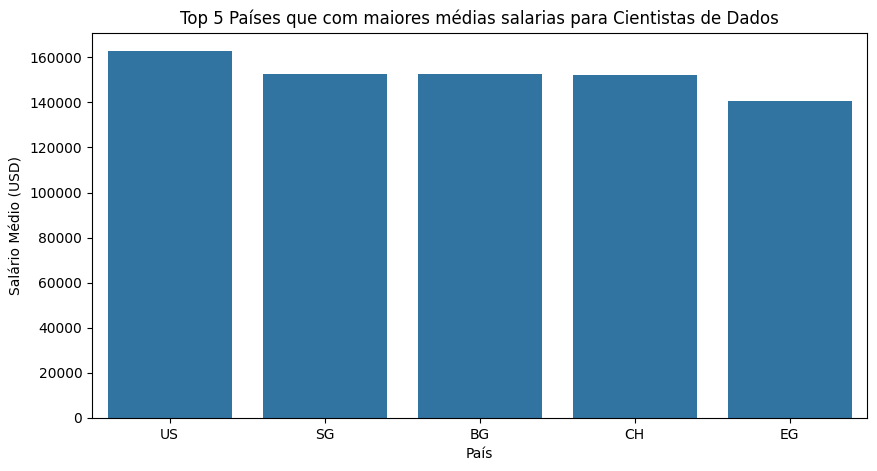

In [53]:
#Qual país paga o maior média salarial para cientistas de dados especificamente?

df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds = df_ds.groupby('residencia')['usd'].mean().sort_values(ascending=False).reset_index()  #Organiza os valores da Series do maior para o menor (ascending=False = ordem decrescente).
                                                                                                  #Se fosse ascending=True, seria do menor para o maior.
plt.figure(figsize=(10, 5))
sns.barplot(x='residencia', y='usd', data=media_ds.head(5))
plt.title('Top 5 Países que com maiores médias salarias para Cientistas de Dados')
plt.xlabel('País')
plt.ylabel('Salário Médio (USD)')
plt.show()


In [54]:
#US - Estados Unidos
#SG - Singapura
#BG - Bulgária
#CH - Suiça
#EG - Egito

# Criando gráficos interativos com Plotly


In [55]:
import plotly.express as px

In [56]:
#Qual é a média salarial por nível de senioridade?
# Refazendo o gráfico na versão interativa

# Calcular média salarial
media_senioridade = df.groupby('senioridade')['usd'].mean().reset_index()

# Criar gráfico
fig = px.bar(media_senioridade, x='senioridade', y='usd',
             title='Salário Médio por Nível de Senioridade',
             labels={'senioridade': 'Senioridade', 'usd': 'Salário Médio (USD)'},
             color='senioridade')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [57]:
#Qual é a proporção dos tipos de trabalho?

remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie( #pie cria um grafico de pizza
    remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Proporção dos Tipos de Trabalho',
    hole=0.5  # opcional: transforma em grafico de rosca - quanto maior o número, maior o buraco
)
fig.update_traces(textinfo='percent+label')
fig.show()

In [58]:
#Qual é o Top 5 de melhores médias salariais por cargo?

top_cargos = df_limpo.groupby('cargo')['usd'].mean().round(2).sort_values(ascending=False).head().reset_index()  #Organiza os valores da Series do maior para o menor (ascending=False = ordem decrescente).
                                                                                                                 #Se fosse ascending=True, seria do menor para o maior.
top_cargos

,cargo,usd
0,Research Team Lead,450000.0
1,Analytics Engineering Manager,399880.0
2,Data Science Tech Lead,375000.0
3,Applied AI ML Lead,292500.0
4,Head of Applied AI,273875.0


In [59]:
# Gráfico interativo
fig = px.bar(
    top_cargos,
    x='cargo',
    y='usd',
    title='Top 5 cargos com maiores médias salariais',
    labels={'usd': 'Salário médio (USD)', 'cargo': 'Cargo'}
)
fig.update_layout(xaxis_title='Cargo', yaxis_title='Salário médio (USD)')
fig.show()

# Mapa do salário médio do Cientista de Dados por país

In [60]:
#Instalação de uma biblioteca para converter os códigos de residência, numa sigla que seja possível criar um mapa:

In [61]:
! pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 89.4 MB/s eta 0:00:00


In [62]:
import pycountry #bibliteca para graficos de mapa

# Função para converter ISO-2 para ISO-3 (abreviação de 2 letras para 3)
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [64]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media,USA
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media,USA
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media,AUS
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media,AUS
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media,USA


In [63]:
df_limpo.to_csv('dados-imersao-final.csv', index=False) #salvando alterações